<center>
    <h1> 
        Teste de Hipótese 1.6: Equalização de "valor" de HSV e ganho em RGB
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>No teste 1.5 encontramos um padrão distinguível das amostras boas e das escuras no "valor" do padrão HSV. Também realizamos um teste pra verificar se seria possível melhorar as imagens ruins ajustando o "valor" delas para um valor de referência calculado pela média do "valor" das amostras boas, entretanto, o resultado não foi bom.</p>
<p>Nesse notebook, iremos testar se a equalização do histograma do "valor" resulta em uma melhora para as amostras escuras.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Equalização global de "valor" <br>
2. Equalização CLAHE de "valor" <br>
3. Comparações <br>
4. Comparações CLAHE com ou sem ganho percentual em RGB <br>
5. Visualização do histograma RGB da equalização CLAHE em "valor" com ganho <br>
6. Equalização CLAHE de "valor" com ganho no formato HSV<br>
7. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 1. Equalização global de "valor"

In [ ]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['rg_frente','rg_tras','cnh_frente','cnh_tras']

In [ ]:
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        docs_ruins.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))

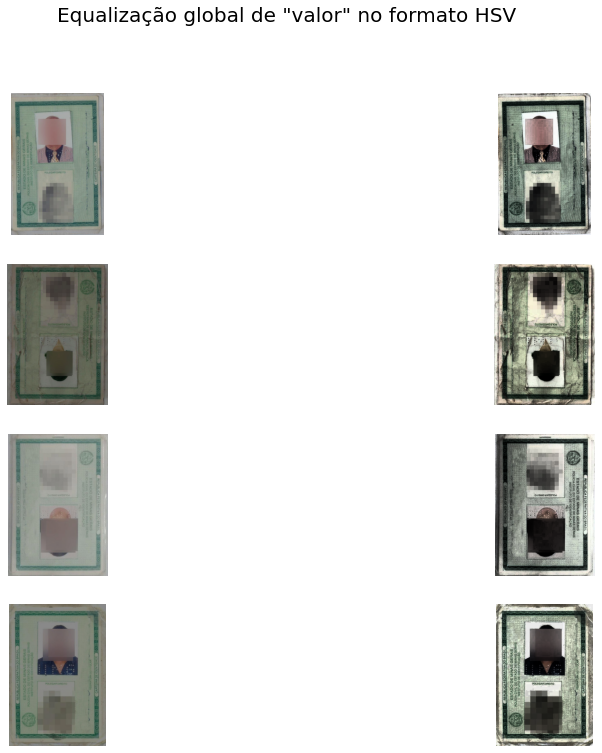

In [5]:
n = len(docs_ruins[0:4])

fig = plt.figure(figsize=(16,3*n))

for i in range(0,len(docs_ruins[0:4])):
    fig.add_subplot(n,2,(i*2)+1)
    plt.imshow(cv2.cvtColor(docs_ruins[i], cv2.COLOR_HSV2RGB))
    plt.axis('off')
    
    H, S, V =  cv2.split(docs_ruins[i])
    V = cv2.equalizeHist(V)
    
    fig.add_subplot(n,2,(i*2)+2)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S, V]), cv2.COLOR_HSV2RGB))
    plt.axis('off')

fig.suptitle('Equalização global de "valor" no formato HSV', fontsize=20)
plt.show();

# 2. Equalização CLAHE de "valor"

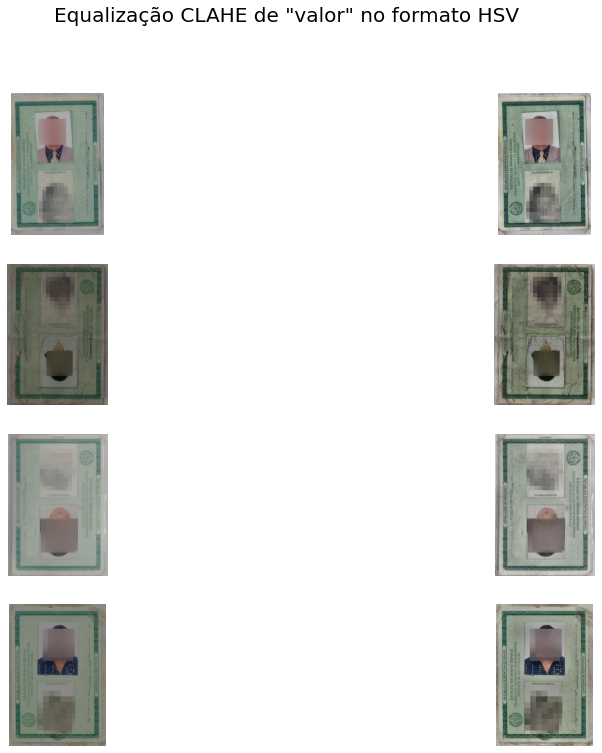

In [6]:
n = len(docs_ruins[0:4])

fig = plt.figure(figsize=(16,3*n))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for i in range(0,len(docs_ruins[0:4])):
    fig.add_subplot(n,2,(i*2)+1)
    plt.imshow(cv2.cvtColor(docs_ruins[i], cv2.COLOR_HSV2RGB))
    plt.axis('off')
    
    H, S, V =  cv2.split(docs_ruins[i])
    #H = clahe.apply(H)
    #S = clahe.apply(S)
    V = clahe.apply(V)
    
    fig.add_subplot(n,2,(i*2)+2)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S, V]), cv2.COLOR_HSV2RGB))
    plt.axis('off')

fig.suptitle('Equalização CLAHE de "valor" no formato HSV', fontsize=20)
plt.show();

# 3. Comparações

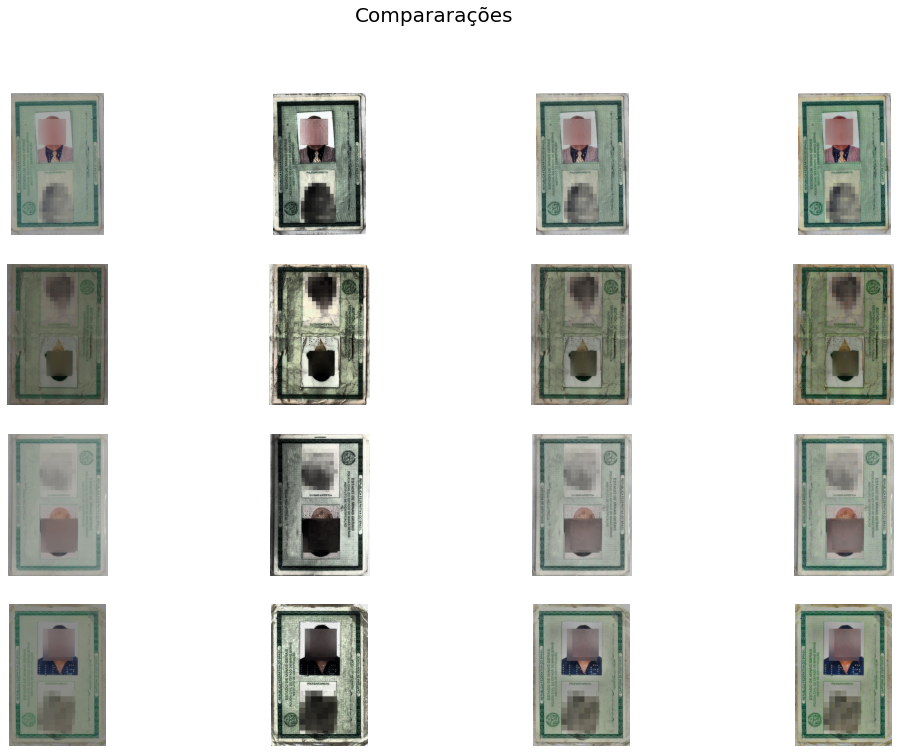

In [8]:
n = len(docs_ruins[0:4])

fig = plt.figure(figsize=(18,3*n))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))

for i in range(0,len(docs_ruins[0:4])):
    fig.add_subplot(n,4,(i*3)+1+i)
    plt.imshow(cv2.cvtColor(docs_ruins[i], cv2.COLOR_HSV2RGB))
    #plt.title('original')
    plt.axis('off')
    
    H, S, V =  cv2.split(docs_ruins[i])
    
    V_eqg = cv2.equalizeHist(V)
    fig.add_subplot(n,4,(i*3)+2+i)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S, V_eqg]), cv2.COLOR_HSV2RGB))
    #plt.title('clahe(v)')
    plt.axis('off')
    
    S_eq = clahe2.apply(S)
    V_eq = clahe.apply(V)
    
    fig.add_subplot(n,4,(i*3)+3+i)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S, V_eq]), cv2.COLOR_HSV2RGB))
    #plt.title('clahe(v)')
    plt.axis('off')
    
    fig.add_subplot(n,4,(i*3)+4+i)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S_eq, V_eq]), cv2.COLOR_HSV2RGB))
    #plt.title('clahe(s,v)')
    plt.axis('off')

fig.suptitle('Compararações', fontsize=20)
plt.show();

Obs.: Não coloquei as legendas para ficar menos informação no plot, facilitando na hora de comparar os resultados. A primeira coluna são as imagens original, a segunda das equalizações globais, a terceiras de equalização clahe em "valor" e a quarta é de equalização clahe em "valor" e saturação. <br>
Como as duas últimas apresentaram melhores resultados, seguiremos tentando adicionar um ganho percentual em RGB da mesma, já testado anteriormente.

# 4. Comparações CLAHE com ou sem ganho percentual em RGB

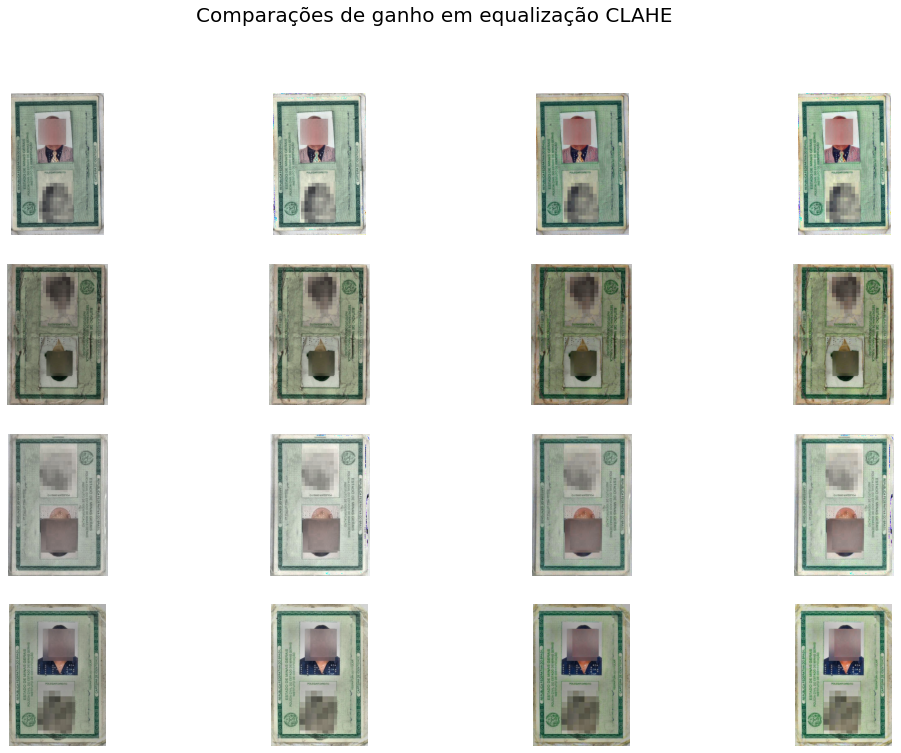

In [9]:
n = len(docs_ruins[0:4])

fig = plt.figure(figsize=(18,3*n))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))

percent = 1.2
for i in range(0,len(docs_ruins[0:4])):
    H, S, V =  cv2.split(docs_ruins[i])
    
    S_eq = clahe2.apply(S)
    V_eq = clahe.apply(V)
    
    fig.add_subplot(n,4,(i*3)+1+i)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S, V_eq]), cv2.COLOR_HSV2RGB))
    #plt.title('clahe(v)')
    plt.axis('off')
    
    fig.add_subplot(n,4,(i*3)+2+i)
    img = cv2.cvtColor(cv2.merge([H, S, V_eq]), cv2.COLOR_HSV2RGB)
    r, g, b = cv2.split(img)
    plt.imshow(cv2.merge((r*(percent*1.002989), g*(percent*1.005870), b*(percent*1.001140))).astype('uint8'))
    plt.axis('off')
    
    fig.add_subplot(n,4,(i*3)+3+i)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S_eq, V_eq]), cv2.COLOR_HSV2RGB))
    #plt.title('clahe(s,v)')
    plt.axis('off')
    
    fig.add_subplot(n,4,(i*3)+4+i)
    img = cv2.cvtColor(cv2.merge([H, S_eq, V_eq]), cv2.COLOR_HSV2RGB)
    r, g, b = cv2.split(img)
    plt.imshow(cv2.merge((r*(percent*1.002989), g*(percent*1.005870), b*(percent*1.001140))).astype('uint8'))
    plt.axis('off')

fig.suptitle('Comparações de ganho em equalização CLAHE', fontsize=20)
plt.show();

# 5. Visualização do histograma RGB da equalização CLAHE em "valor" com ganho

In [18]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))

H, S, V =  cv2.split(docs_ruins[0])
S_eq = clahe2.apply(S)
V_eq = clahe.apply(V)

img = cv2.cvtColor(cv2.merge([H, S, V_eq]), cv2.COLOR_HSV2RGB)
r, g, b = cv2.split(img)

img_clahe = cv2.merge((r*(percent*1.002989), g*(percent*1.005870), b*(percent*1.001140))).astype('uint8')

In [19]:
hist_clahe = []
hist_clahe.append(cv2.calcHist(img_clahe,[0],None,[256],[0,256]))  # histogra "bruto" vermelho
hist_clahe.append(cv2.calcHist(img_clahe,[1],None,[256],[0,256]))  # histogra "bruto" verde
hist_clahe.append(cv2.calcHist(img_clahe,[2],None,[256],[0,256]))  # histogra "bruto" azul

In [20]:
img_ori = cv2.cvtColor(docs_ruins[0], cv2.COLOR_HSV2RGB)
hist_ori = []
hist_ori.append(cv2.calcHist(img_ori,[0],None,[256],[0,256]))  # histogra "bruto" vermelho
hist_ori.append(cv2.calcHist(img_ori,[1],None,[256],[0,256]))  # histogra "bruto" verde
hist_ori.append(cv2.calcHist(img_ori,[2],None,[256],[0,256]))  # histogra "bruto" azul

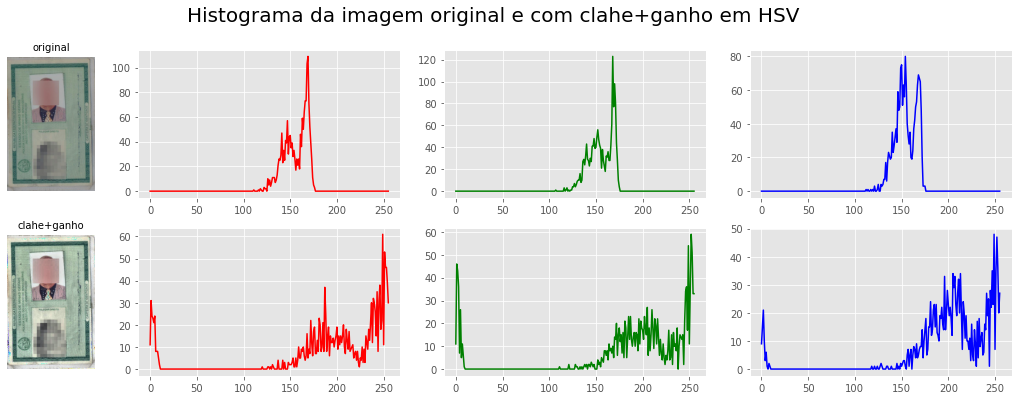

In [22]:
# Agora vamos plotar os dois tipos de histograma
n = 2 # Número de linhas do plot
# Definindo o "esqueleto" do plot e configurações de grade
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

# Ajuste
ax.flatten()
ax = ax.T.flatten()

ax[0].imshow(img_ori) # Plotando o documento
ax[0].axis('off')
ax[0].set_title('original',fontsize=10)

ax[1].imshow(img_clahe) # Plotando o documento
ax[1].axis('off')
ax[1].set_title('clahe+ganho',fontsize=10)

# Plot dos histrogramas "brutos"
ax[2].plot(hist_ori[0], color='red')
ax[4].plot(hist_ori[1], color='green')
ax[6].plot(hist_ori[2], color='blue')

# Plot dos histogramas normalizados
ax[3].plot(hist_clahe[0], color='red')
ax[5].plot(hist_clahe[1], color='green')
ax[7].plot(hist_clahe[2], color='blue')
    
fig.suptitle('Histograma da imagem original e com clahe+ganho em HSV', fontsize=20)
plt.show()

# 6. Equalização CLAHE de "valor" com ganho no formato HSV

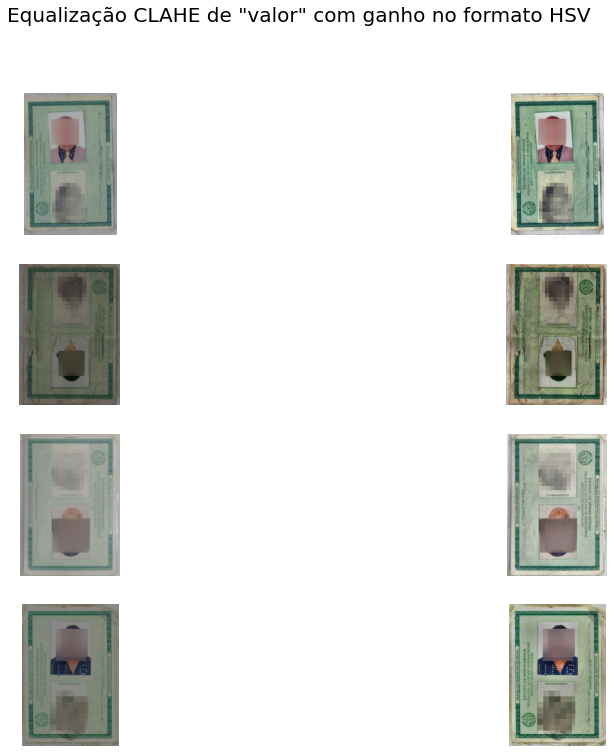

In [34]:
n = len(docs_ruins[0:4])

fig = plt.figure(figsize=(16,3*n))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))

for i in range(0,len(docs_ruins[0:4])):
    fig.add_subplot(n,2,(i*2)+1)
    plt.imshow(cv2.cvtColor(docs_ruins[i], cv2.COLOR_HSV2RGB))
    plt.axis('off')
    
    H, S, V =  cv2.split(docs_ruins[i])
    S_eq = clahe2.apply(S)
    V_eq = clahe.apply((V*1.3).astype('uint8'))
    
    fig.add_subplot(n,2,(i*2)+2)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S_eq, V_eq]), cv2.COLOR_HSV2RGB))
    plt.axis('off')

fig.suptitle('Equalização CLAHE de "valor" com ganho no formato HSV', fontsize=20)
plt.show();

# 5. Conclusão

Nesse teste, verificamos que ao invés de somente aplicar um ganho para ajustar o "valor" das amostras ruins, podemos aplicar uma equalização para apresentar melhores resultados. <br>
Comparando com os resultados anteriores, temos que o resultado atual é semelhante ao resultado da equalização clahe nos canais RGB com ganho percentual. No final, também verificamos o resultado na equalização clahe depois de aplicar o ganho no formato HSV, e também o inverso, mas apresentaram quase o mesmo resultado do que a equalização clahe em "valor" e depois o ganho em RGB.